In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('job_data_salary_cleaned.csv')

Some further feature engineering from the job titles

In [3]:
df['senior'] = df['job_title'].apply(lambda x: 1 if 'senior' in x.lower() else 0)

Handle the hourly wages by converting them to annual

In [4]:
# Rough estimation based on 38 hour working weeks and 50 weeks worked a year.
df['salary'] = df.apply(lambda x: x.salary*1900 if x.salary_hourly == 1 else x.salary, axis = 1)

In [5]:
df.drop('salary_hourly', axis=1, inplace=True)

Diving into the EDA

In [6]:
df.describe()

,salary,company_rating,python,SQL,excel,tableau,power_bi,math,machine_learning,statistics,presentation,reporting,company_age,senior
count,1034.000000,877.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,561.000000,1034.000000
mean,106474.314313,12.097035,0.207930,0.329787,0.590909,0.134429,0.178917,0.120890,0.106383,0.200193,0.194391,0.505803,55.016043,0.238878
std,27371.798294,171.875624,0.406023,0.470363,0.491904,0.341278,0.383468,0.326157,0.308476,0.400339,0.395922,0.500208,48.174920,0.426604
min,15900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,88790.750000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000
50%,103078.000000,3.900000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,38.000000,0.000000
75%,119014.000000,4.200000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,74.000000,0.000000
max,342000.000000,3605.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,224.000000,1.000000


In [7]:
df[df['company_rating'] > 5]

,job_title,salary,company_size,company_type,company_industry,company_sector,company_revenue,company_name,company_rating,state,...,excel,tableau,power_bi,math,machine_learning,statistics,presentation,reporting,company_age,senior
124,ICT Business Analyst,102701.0,NaN,Company - Private,NaN,NaN,NaN,BAR,3605.0,NSW,...,0,0,0,0,0,0,0,0,NaN,0
413,Sr. BI Developer,115152.0,NaN,Company - Private,NaN,NaN,NaN,BAR,3605.0,NSW,...,0,0,0,0,0,0,0,0,NaN,0
439,ServiceNow Technical Business Analyst,137500.0,201-500,Company - Private,Information Technology Support Services,Information Technology,NaN,AC,33.4,NSW,...,1,0,0,0,0,0,0,0,24.0,0


In [8]:
df.loc[df['company_name'] == 'BAR', 'company_name'] = "BAR360"

In [9]:
df.loc[df['company_name'] == 'BAR360', 'company_rating'] = 5.0

In [10]:
df.loc[df['company_name'] == 'AC', 'company_name'] = 'AC3'

In [11]:
df.loc[df['company_name'] == 'AC3', 'company_rating'] = 3.4

In [12]:
df.describe()

,salary,company_rating,python,SQL,excel,tableau,power_bi,math,machine_learning,statistics,presentation,reporting,company_age,senior
count,1034.000000,877.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,561.000000,1034.000000
mean,106474.314313,3.853022,0.207930,0.329787,0.590909,0.134429,0.178917,0.120890,0.106383,0.200193,0.194391,0.505803,55.016043,0.238878
std,27371.798294,0.616075,0.406023,0.470363,0.491904,0.341278,0.383468,0.326157,0.308476,0.400339,0.395922,0.500208,48.174920,0.426604
min,15900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,88790.750000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000
50%,103078.000000,3.900000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,38.000000,0.000000
75%,119014.000000,4.200000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,74.000000,0.000000
max,342000.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,224.000000,1.000000


<Axes: >

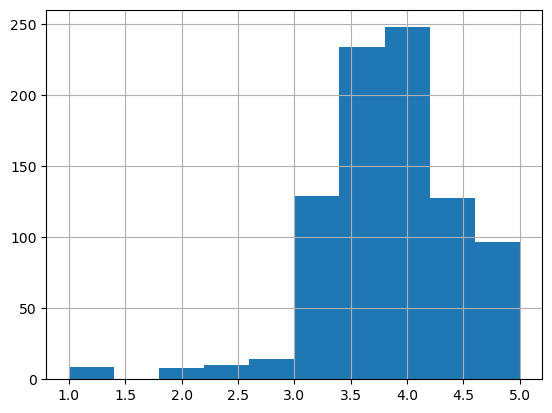

In [13]:
df.company_rating.hist()

<Axes: >

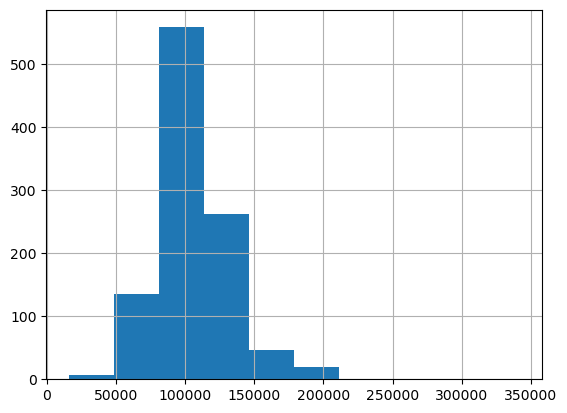

In [14]:
df.salary.hist()

<Axes: >

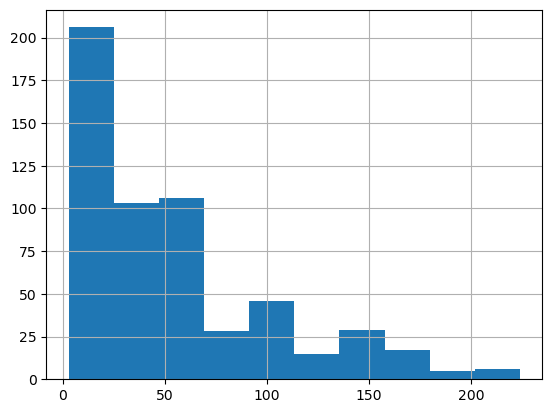

In [47]:
df.company_age.hist()

<Axes: ylabel='company_rating'>

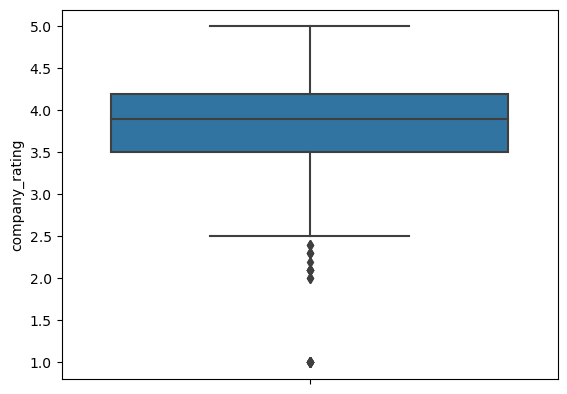

In [49]:
sns.boxplot(df, y='company_rating')

In [77]:
df.columns

Index(['job_title', 'salary', 'company_size', 'company_type',
       'company_industry', 'company_sector', 'company_revenue', 'company_name',
       'company_rating', 'state', 'python', 'SQL', 'excel', 'tableau',
       'power_bi', 'math', 'machine_learning', 'statistics', 'presentation',
       'reporting', 'company_age', 'senior'],
      dtype='object')

In [86]:
df_cat = df[['company_industry', 'company_type', 'company_size', 'company_sector', 'company_revenue', 'state', 'python', 'SQL', 'excel', 'tableau',
             'power_bi', 'math', 'machine_learning', 'statistics', 'presentation','reporting', 'senior']]

Graph for company_industry: total = 67


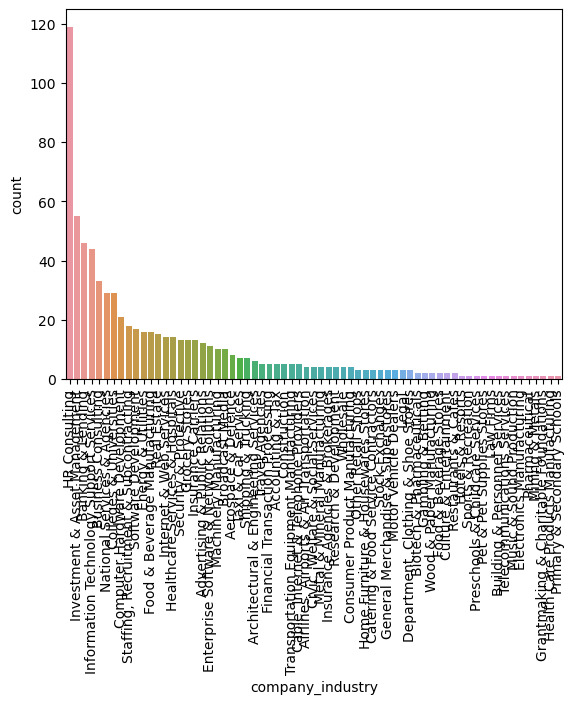

Graph for company_type: total = 10


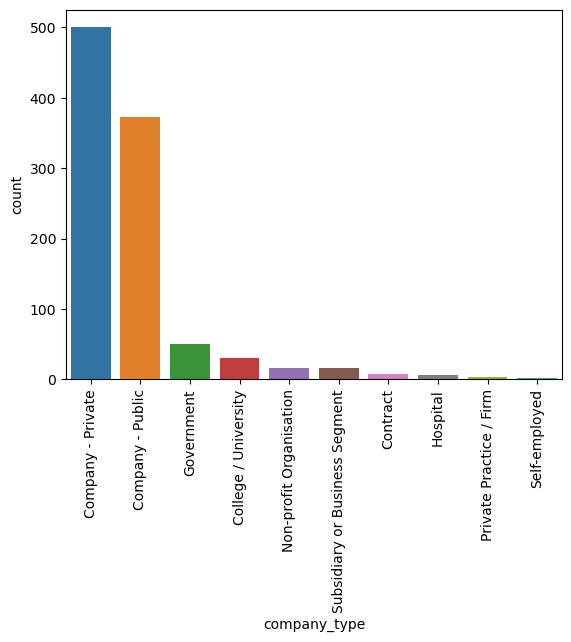

Graph for company_size: total = 7


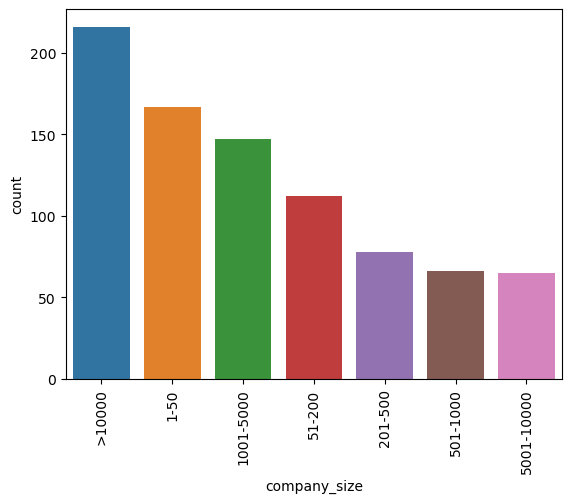

Graph for company_sector: total = 23


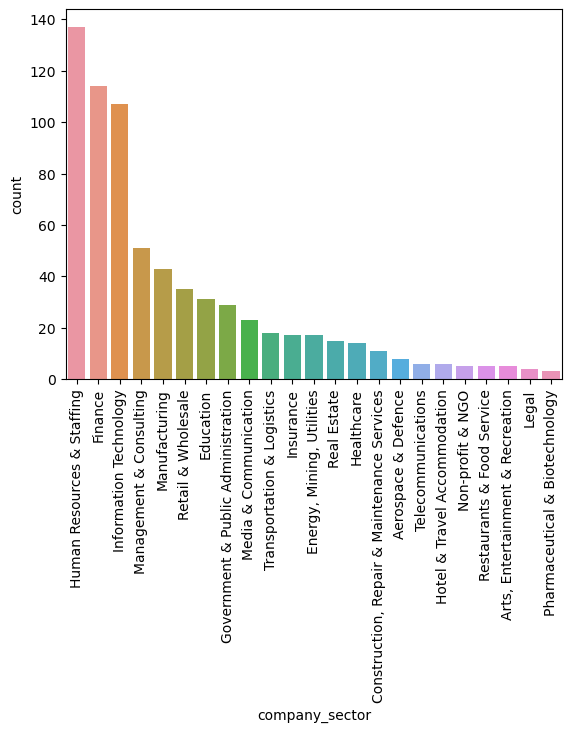

Graph for company_revenue: total = 9


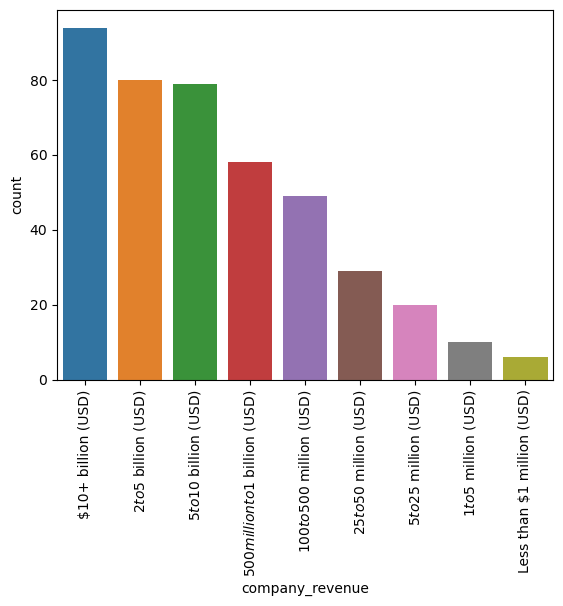

Graph for state: total = 9


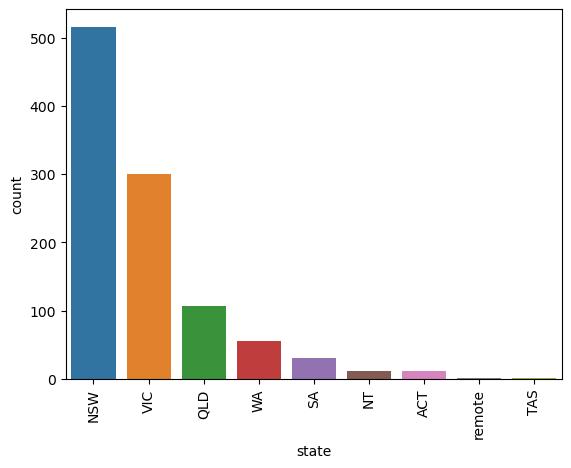

Graph for python: total = 2


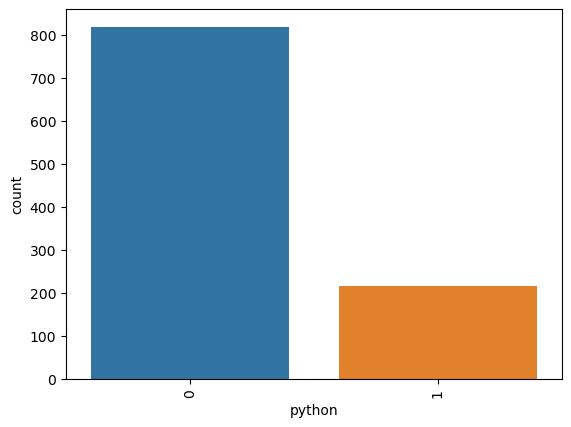

Graph for SQL: total = 2


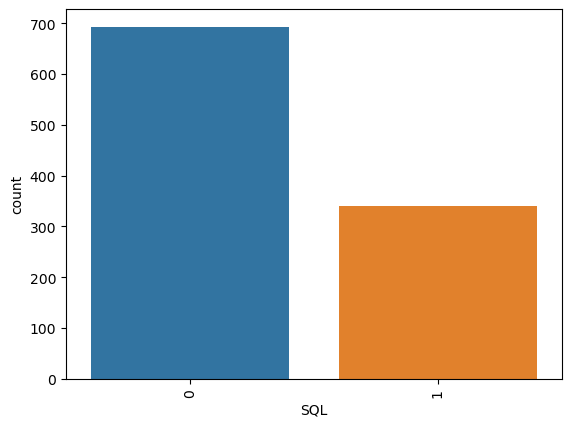

Graph for excel: total = 2


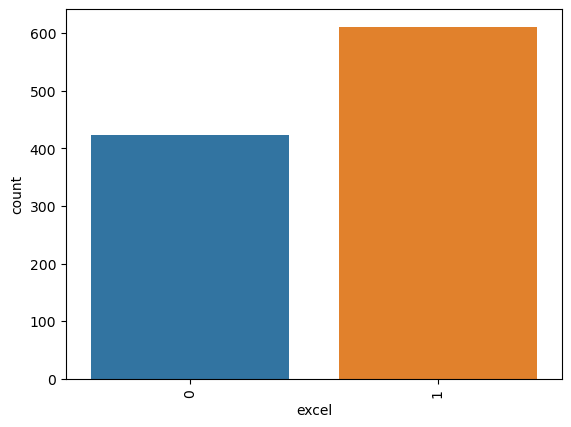

Graph for tableau: total = 2


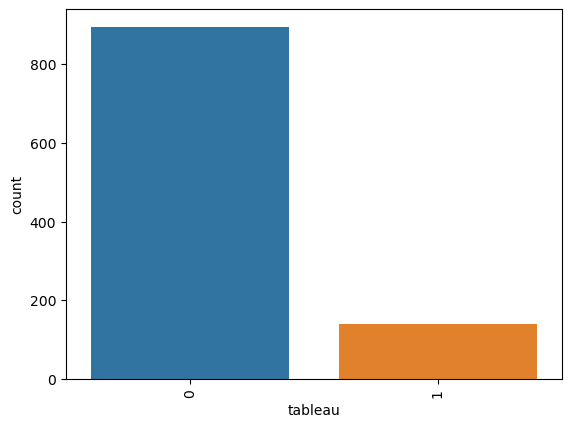

Graph for power_bi: total = 2


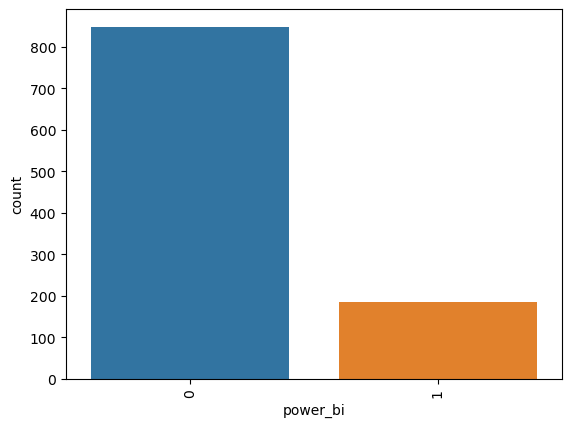

Graph for math: total = 2


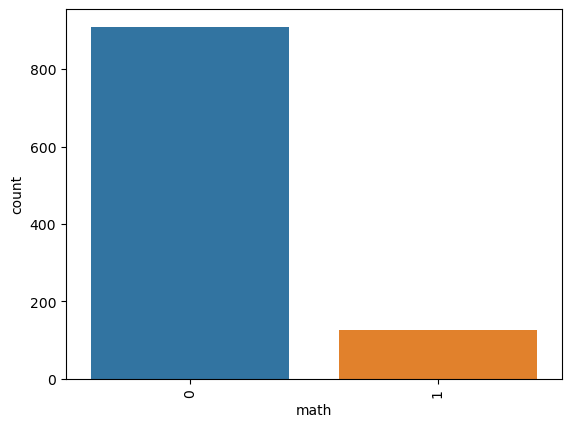

Graph for machine_learning: total = 2


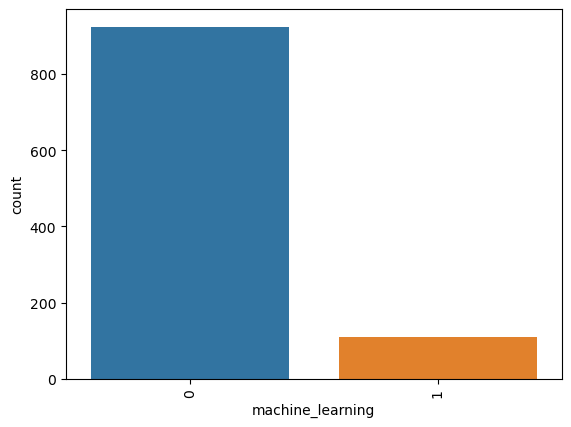

Graph for statistics: total = 2


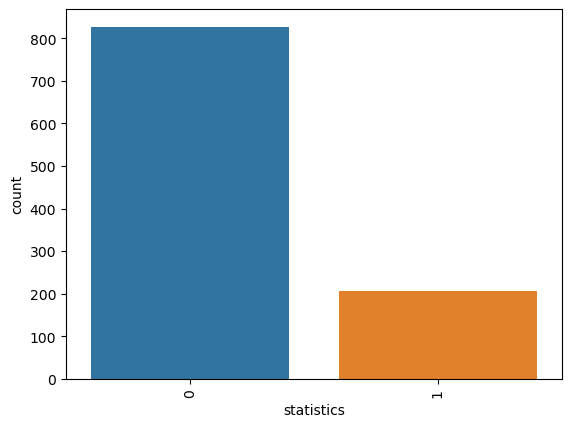

Graph for presentation: total = 2


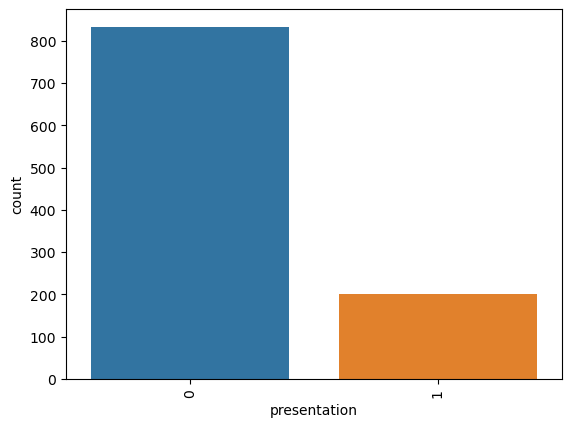

Graph for reporting: total = 2


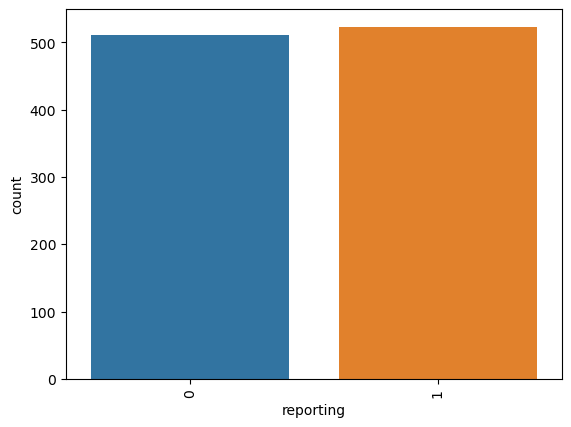

Graph for senior: total = 2


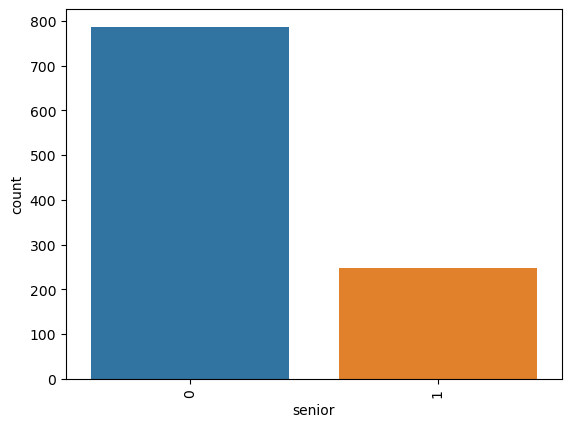

In [87]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print(f"Graph for {i}: total = {len(cat_num)}")
    sns.barplot(x=cat_num.index, y=cat_num)
    plt.xticks(rotation=90)
    plt.show()

In [90]:
df['company_name'].value_counts().head(20)

company_name
Macquarie Group Limited          24
Anton Murray Consulting          23
Commonwealth Bank                19
Charterhouse                     14
Peoplebank                       12
Michael Page                     12
Paxus Australia Pty Ltd          12
Link Group                       11
SKL Actuarial                    10
Zone IT Solutions                 9
Robert Half                       9
Sharp & Carter                    8
Infosys Singapore & Australia     7
Bank of Queensland                7
HAYS                              7
Chandler Macleod                  7
Resources Group AU                7
Bluefin Resources                 7
D'Arcy Weil                       7
Ever Better Recruitment (EBR)     6
Name: count, dtype: int64

In [21]:
company_size_order = ['1-50', '51-200', '201-500', '501-1000', '1001-5000', '5001-10000', '>10000']

<Axes: xlabel='company_size', ylabel='salary'>

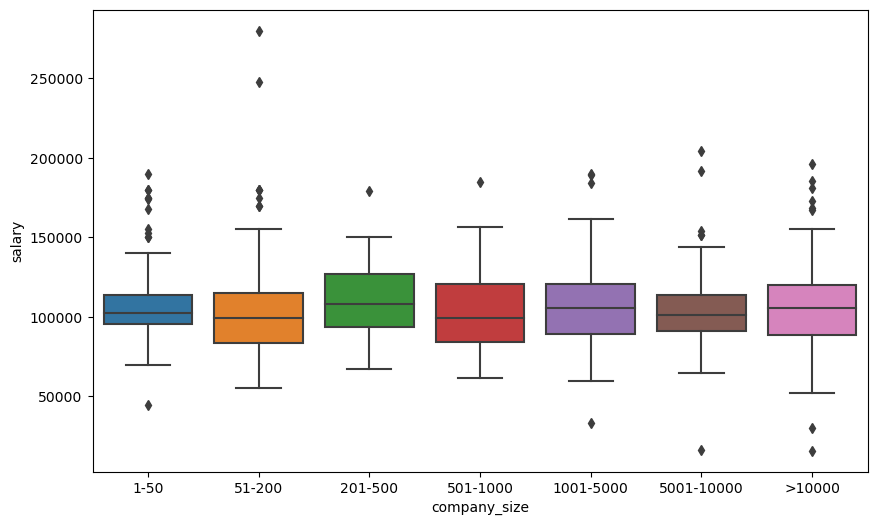

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='company_size', y='salary', order=company_size_order)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Company - Private'),
  Text(1, 0, 'Company - Public'),
  Text(2, 0, 'Government'),
  Text(3, 0, 'Non-profit Organisation'),
  Text(4, 0, 'Subsidiary or Business Segment'),
  Text(5, 0, 'College / University'),
  Text(6, 0, 'Contract'),
  Text(7, 0, 'Private Practice / Firm'),
  Text(8, 0, 'Hospital'),
  Text(9, 0, 'Self-employed')])

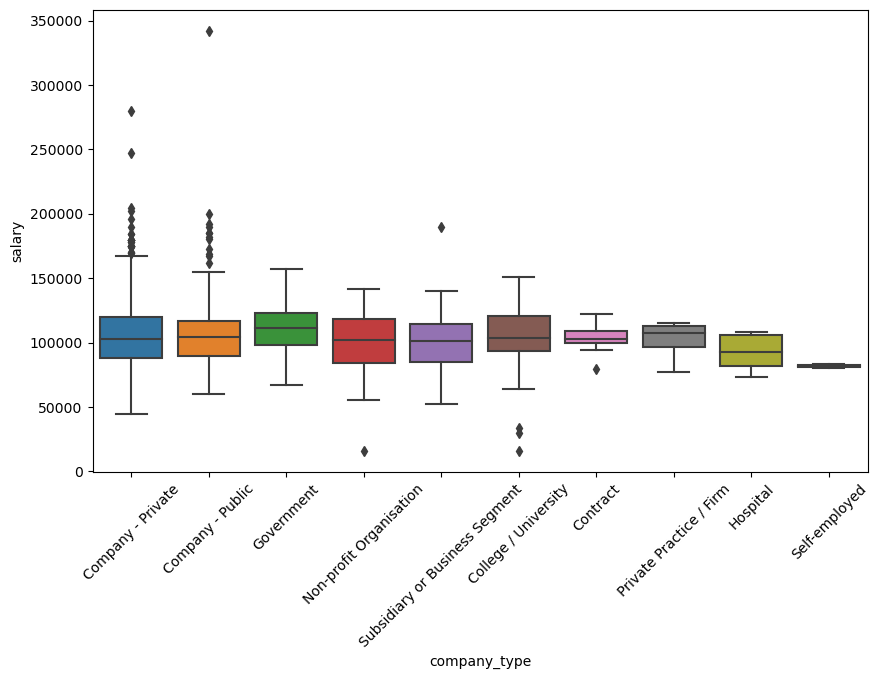

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='company_type', y='salary')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Government'),
  Text(1, 0, 'Company - Private'),
  Text(2, 0, 'Company - Public'),
  Text(3, 0, 'Subsidiary or Business Segment'),
  Text(4, 0, 'College / University'),
  Text(5, 0, 'Contract'),
  Text(6, 0, 'Private Practice / Firm'),
  Text(7, 0, 'Non-profit Organisation'),
  Text(8, 0, 'Hospital'),
  Text(9, 0, 'Self-employed')])

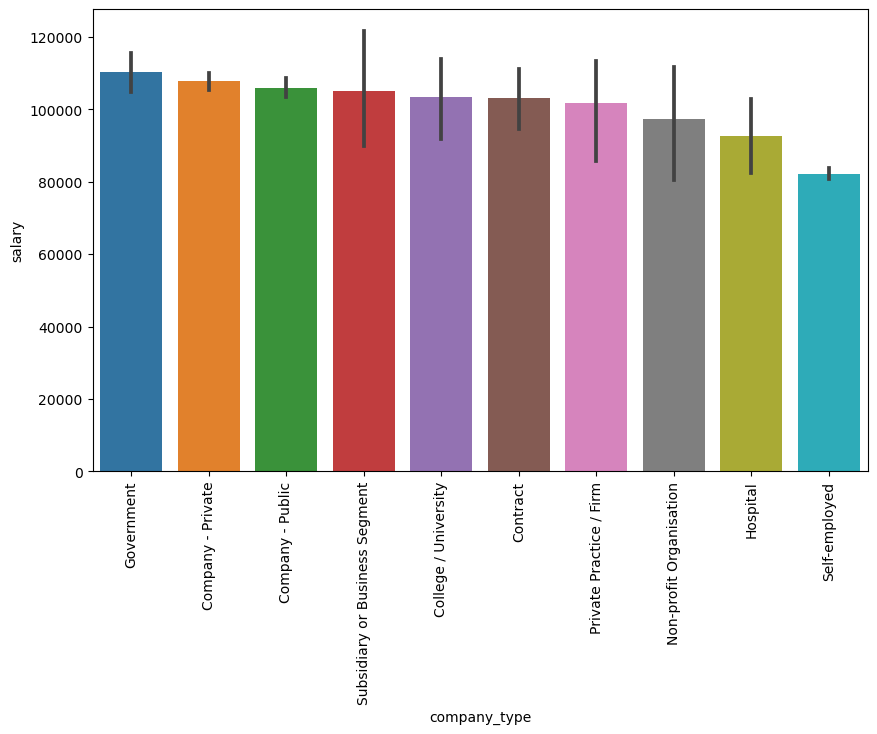

In [44]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='company_type', y='salary', dodge=False,
            order= df.groupby('company_type')['salary'].mean().sort_values(ascending=False).index)
plt.xticks(rotation=90)

In [72]:
df['company_sector'].value_counts()

company_sector
Human Resources & Staffing                     137
Finance                                        114
Information Technology                         107
Management & Consulting                         51
Manufacturing                                   43
Retail & Wholesale                              35
Education                                       31
Government & Public Administration              29
Media & Communication                           23
Transportation & Logistics                      18
Insurance                                       17
Energy, Mining, Utilities                       17
Real Estate                                     15
Healthcare                                      14
Construction, Repair & Maintenance Services     11
Aerospace & Defence                              8
Telecommunications                               6
Hotel & Travel Accommodation                     6
Non-profit & NGO                                 5
Restaurants & Fo

In [98]:
pd.pivot_table(df, index = 'state', values = 'salary').sort_values('salary', ascending=False)

,salary
state,
remote,145000.000000
NSW,109158.786822
ACT,107230.181818
SA,106079.419355
VIC,104761.060000
WA,103456.254545
QLD,101106.457944
TAS,94090.000000
NT,93718.333333


In [91]:
# Filter out 'remote' and 'TAS' entries
filtered_df_state = df[~df['state'].isin(['remote', 'TAS'])]

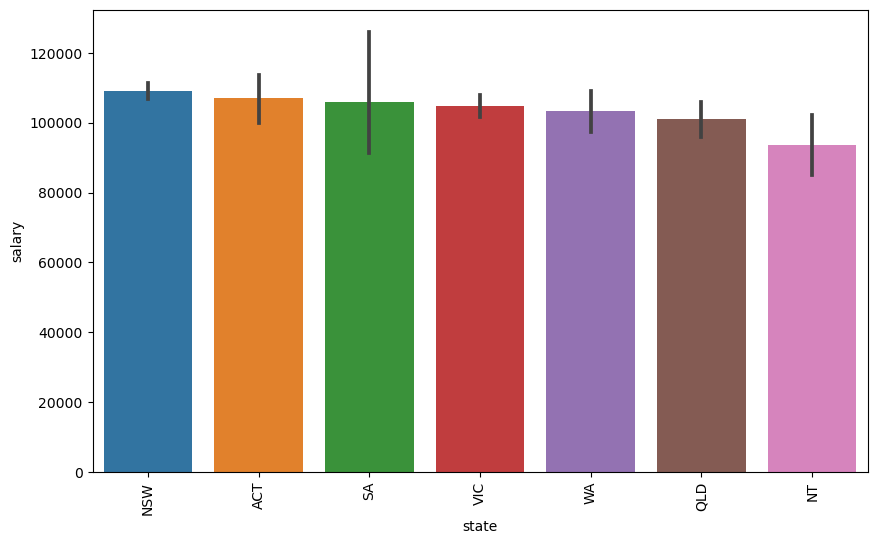

In [106]:
state_order_salary = filtered_df_state.groupby('state')['salary'].mean().sort_values(ascending=False).index

plt.figure(figsize=(10,6))
sns.barplot(data=filtered_df_state, x='state', y='salary', order=state_order_salary)
plt.xticks(rotation=90)
plt.show()

In [107]:
df_cat['salary'] = df['salary']

C:\Users\alexs\AppData\Local\Temp\ipykernel_26468\367158691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['salary'] = df['salary']


In [108]:
for i in df_cat.columns:
    print(i)
    print(pd.pivot_table(df_cat, index=i, values='salary').sort_values('salary', ascending=False))

company_industry
                                               salary
company_industry                                     
Mining & Metals                         148245.000000
Primary & Secondary Schools             145000.000000
Travel Agencies                         135676.000000
Stock Exchanges                         134760.333333
Transportation Equipment Manufacturing  128328.000000
...                                               ...
Other Retail Shops                       77964.333333
Wood & Paper Manufacturing               71456.500000
Restaurants & Cafes                      67521.000000
Building & Personnel Services            64502.000000
Preschools & Childcare Services          64074.000000

[67 rows x 1 columns]
company_type
                                       salary
company_type                                 
Government                      110262.440000
Company - Private               107747.854000
Company - Public                105824.193548
Subsidiary or B

ValueError: Grouper for 'salary' not 1-dimensional

In [102]:
df[['salary', 'company_rating', 'company_age']].corr()

,salary,company_rating,company_age
salary,1.000000,0.058427,-0.036049
company_rating,0.058427,1.000000,-0.092906
company_age,-0.036049,-0.092906,1.000000


<Axes: >

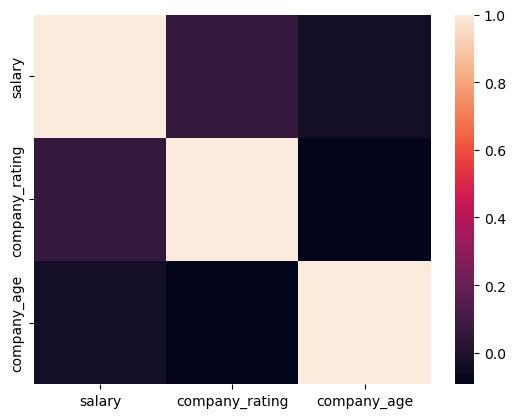

In [103]:
sns.heatmap(df[['salary', 'company_rating', 'company_age']].corr())